# 3 Problem 2 - Data Preprocessing

#### 1. Assuming that the missing value (marked with “?”) in GDPPC cannot be ignored, discuss 3 different alternatives to fill in that missing value. In each case, state what the selected value would be and the advantages and disadvantages of the approach. You may assume that the SWL attribute is the target attribute.

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [17]:
GDPPC = {
    'GDPPC': [32.3, 34, 30.4, 10, 29.9, 8.3, 8.4, 31.5, 3.3, 0.9, 11.1]
}

GDPCC = pd.DataFrame(GDPPC)
mean_value = GDPCC['GDPPC'].mean()
mean_value

18.19090909090909

One method to fill in the missing value is mean imputation. The value would be 18.2 using this method. An advantage of this method is that it is quick and not complex. A disadvantage of this method is that it can introduce bias and reduce variance in the data. 

In [18]:
median_value = GDPCC['GDPPC'].median()
median_value

11.1

Another method to fill in the missing value is median imputation. The value would be 11.1 using this method. An advantage of this method is that it is not affected too heavily by outliers. A disadvantage is that it does not capture relationships between variables.

In [19]:
df = {
    'COUNTRY': ['Switzerland', 'Canada', 'USA', 'Germany', 'Mexico', 'France', 'Thailand', 'Brazil', 'Japan', 'India', 'Ethiopia', 'Russia'],
    'LIFE-EXP': [80.5, 80, 77.4, 78.7, 75.1, 79.5, 70, 70.5, 82, 63.3, 47.6, 65.3],
    'GDPPC': [32.3, 34, np.nan, 30.4, 10, 29.9, 8.3, 8.4, 31.5, 3.3, 0.9, 11.1],
    'AC-S-ED': [99.9, 102.6, 94.6, 99, 73.4, 108.7, 79, 103.2, 102.1, 49.9, 5.2, 81.9],
    'SWL': ['[250-275)', '[250-275)', '[225-250)', '[225-250)', '[225-250)', '[200-225)', '[200-225)', '[200-225)', '[200-225)', '[175-200)', '[150-175)', '[125-150)']
}

df = pd.DataFrame(df)

print(df)

        COUNTRY  LIFE-EXP  GDPPC  AC-S-ED        SWL
0   Switzerland      80.5   32.3     99.9  [250-275)
1        Canada      80.0   34.0    102.6  [250-275)
2           USA      77.4    NaN     94.6  [225-250)
3       Germany      78.7   30.4     99.0  [225-250)
4        Mexico      75.1   10.0     73.4  [225-250)
5        France      79.5   29.9    108.7  [200-225)
6      Thailand      70.0    8.3     79.0  [200-225)
7        Brazil      70.5    8.4    103.2  [200-225)
8         Japan      82.0   31.5    102.1  [200-225)
9         India      63.3    3.3     49.9  [175-200)
10     Ethiopia      47.6    0.9      5.2  [150-175)
11       Russia      65.3   11.1     81.9  [125-150)


In [20]:
train_data = df.dropna(subset=['GDPPC'])

X_train = train_data[['LIFE-EXP', 'AC-S-ED']]
y_train = train_data['GDPPC']

model = LinearRegression()
model.fit(X_train, y_train)

usa_data = df[df['COUNTRY'] == 'USA'][['LIFE-EXP', 'AC-S-ED']]
predicted_gdppc_usa = model.predict(usa_data)


df.loc[df['COUNTRY'] == 'USA', 'GDPPC'] = predicted_gdppc_usa[0]

print(df)

        COUNTRY  LIFE-EXP      GDPPC  AC-S-ED        SWL
0   Switzerland      80.5  32.300000     99.9  [250-275)
1        Canada      80.0  34.000000    102.6  [250-275)
2           USA      77.4  24.151192     94.6  [225-250)
3       Germany      78.7  30.400000     99.0  [225-250)
4        Mexico      75.1  10.000000     73.4  [225-250)
5        France      79.5  29.900000    108.7  [200-225)
6      Thailand      70.0   8.300000     79.0  [200-225)
7        Brazil      70.5   8.400000    103.2  [200-225)
8         Japan      82.0  31.500000    102.1  [200-225)
9         India      63.3   3.300000     49.9  [175-200)
10     Ethiopia      47.6   0.900000      5.2  [150-175)
11       Russia      65.3  11.100000     81.9  [125-150)


The last method is regression imputation. The value for this method is 24.2. An advantage of this method is that it takes into account the relationships between the variables to impute the missing data. A disadvantage of this method is that it is more time consuming than the other two methods I mentioned. 

#### 2. Would you keep the attribute COUNTRY in your dataset when mining for patterns that predict the values for the SWL attribute? Explain your answer.

Yes, I would keep the attribute COUNTRY in the dataset when mining for patterns that predict the values for the SWL attribute. This is because I can analyze country specific trends that I could not analyze without that attribute. 

#### 3. Describe a reasonable transformation of the attribute COUNTRY so that the number of different values for that attribute is reduced to just 4.

A reasonable transformation of the attribute COUNTRY would be grouping the countries by their geographical region. In this dataset, I would create a group for countres in North America or South America (Canada, USA, Mexico, and Brazil). I would then create a group for the European countries (Switzerland, Germany, and France). I would then create a group for the Asian countries (Thailand, Japan, and India). And lastly I would create a group for other countries that do not fall into any of those three groups (Ethiopia and Russia). Russia does not fall into any of the groups because it is a part of both Europe and Asia. 

#### 4. Discretize the AC-S-ED attribute by binning it into 4 equi-width intervals using unsupervised discretization. Perform this discretization by hand (i.e., do not use any software tools). Explain your answer.

AC-S-ED Range: 108.7−5.2=103.5.

Width of each Interval: 103.5/4=25.875

Interval 1: [5.2, 5.2+25.875)=[5.2,31.075)

Interval 2: [31.075, 31.075+25.875)=[31.075,56.95)

Interval 3: [56.95, 56.95+25.875)=[56.95,82.825)

Interval 4: [82.825,108.7]

I calculated the range of the AC-S-ED column by subtracting the smallest value in the column from the largest value in the column. I calculated the width of each interval by dividing the range by 4 since we want 4 equi-width intervals. To calculate the range of each interval, I start at the minimum value (5.2) and used that as the starting point for interval 1. I then added the width of each interval (25.875) to the minimum value of interval 1 (5.2) to get the maximum value of interval 1 (31.075). I repeated this process until I got 4 intervals, using the maximum value of the previous interval as the minimum value of the next interval. 

#### 5. Discretize the AC-S-ED attribute by binning it into 4 equi-depth (= equalfrequency) intervals using unsupervised discretization. Perform this discretization by hand (i.e., do not use any software). Explain your answer.

AC-S-ED sorted: 5.2,49.9,73.4,79,81.9,94.6,99,99.9,102.1,102.6,103.2,108.7

Group Size: 12/4=3

Interval 1: [5.2,49.9,73.4]

Interval 2: [79,81.9,94.6]

Interval 3: [99,99.9,102.1]

Interval 4: [102.6,103.2,108.7]

First, I sorted the data in the AC-S-ED column in ascending order. Then, I determined the group size by dividing the number of rows in the column (12) by the number of intervals (4). Finally, I used the sorted data to determine the inervals by filling each interval in ascending order, putting 3 data points in each interval until i got 4 intervals. 

#### 6. Consider the following new approach to discretizing a numeric attribute: Given the mean and the standard deviation (sd) of the attribute values, bin the attribute values into the following intervals: [mean − (k + 1) × sd, mean − k × sd), ∀k = . . . , −4, −3, −2, −1, 0, 1, 2, . . . Assume that the mean of the attribute AC-S-ED above is 83 and that the standard deviation sd of this attribute is 30. Discretize AC-S-ED by hand using this new approach. Show your work.

mean: 83

sd: 30

k=-4: [83−(−4+1)×30,83−(−4)×30)=[83−(−3×30),83−(−4×30))=[173,203)

k=-3: [83−(−3+1)×30,83−(−3)×30)=[83−(−2×30),83−(−3×30))=[143,173)

k=-2: [83−(−2+1)×30,83−(−2)×30)=[83−(−1×30),83−(−2×30))=[113,143)

k=-1: [83−(−1+1)×30,83−(−1)×30)=[83−(0×30),83−(−1×30))=[83,113)

k=0: [83−(0+1)×30,83−0×30)=[83−30,83)=[53,83)

k=1: [83−(1+1)×30,83−1×30)=[83−60,83−30)=[23,53)

k=2: [83−(2+1)×30,83−2×30)=[83−90,83−60)=[−7,23)

# 4 Problem 3 - Exploratory Data Analysis 
#### Consider Auto Dataset available at the UCI Machine Learning Repository. Load the dataset into python within a IPython notebook. 

#### • Make the attributes mpg, displacement, horsepower, weight, and acceleration continuous. 
#### • Make the attributes cylinders, model-year, and origin discrete; 
#### • Make the attribute car-name string.

In [30]:
df = pd.read_csv('/Users/adamyeeter/CSE 5713/Adam Syed Assignment 5/auto-mpg.csv', header=None, delim_whitespace=True)

column_names = [
    'mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 
    'acceleration', 'model_year', 'origin', 'car_name'
]

df.columns = column_names

df['mpg'] = df['mpg'].astype(float)
df['displacement'] = df['displacement'].astype(float)
df['horsepower'] = df['horsepower'].replace('?', np.nan).astype(float)
df['weight'] = df['weight'].astype(float)
df['acceleration'] = df['acceleration'].astype(float)
df['cylinders'] = df['cylinders'].astype(int)
df['model_year'] = df['model_year'].astype(int)
df['origin'] = df['origin'].astype(int)
df['car_name'] = df['car_name'].astype(str)

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


#### 1. Start by familiarizing yourself with the dataset. Carefully look at the data directly (for this, use Python functionality to explore and visualize the data). Describe in your report your observations about what is good about this data (mention at least 2 different good things), and what is problematic about this data (mention at least 2 different bad things). If appropriate, include visualizations of those good/bad things.

In [33]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

In [34]:
df.shape[0]

398

One good thing about the data is that most of the data is present in the dataset. There is only a few NA's and all of them are located in the horsepower column. Another good thing about the data is that there is a lot of rows. This is good because it means I have more data to draw meaningful analyses from.  A problematic thing about the data is that the first row of data is listed in the header and is in the space where the column names are meant to be. I corrected this when I loaded the data. Another problematic thing about the data is that the origin column was in the same column as 'car_name' and that the 'car_name' column was split into two columns for some of the rows. I also corrected this when I loaded the data.

#### 2. For the horsepower attribute: (a) Calculate the percentiles in increments of 10, the mean, median, range, and variance. (b) Plot a histogram of the attribute using 10 or 20 bins.

In [47]:
np.percentile(df['horsepower'].dropna(), np.arange(10, 100, 10))

array([ 67. ,  72. ,  80. ,  88. ,  93.5, 100. , 110. , 140. , 157.7])

In [48]:
df['horsepower'].mean()

104.46938775510205

In [49]:
df['horsepower'].median()

93.5

In [50]:
df['horsepower'].max() - df['horsepower'].min()

184.0

In [51]:
df['horsepower'].var()

1481.5693929745862

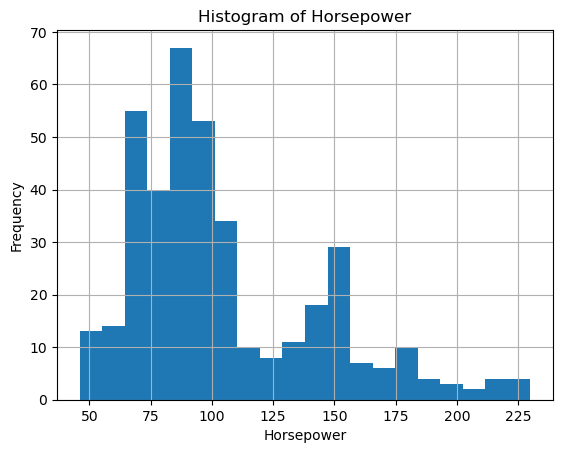

In [52]:
df['horsepower'].hist(bins=20)
plt.title('Histogram of Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#### 3. Use the discrete attributes as if they were continuous. For the set of all attributes in the dataset except for car-name, calculate 1) the covariance matrix and 2) the correlation matrix of these attributes. Construct a visualization of each of these matrices to more easily understand them.

In [66]:
df_numeric = df.drop('car_name', axis=1)
covariance_matrix = df_numeric.cov()
covariance_matrix

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
mpg,61.089611,-10.308911,-655.402318,-233.857926,-5505.211745,9.058930,16.741163,3.532185
cylinders,-10.308911,2.893415,168.623214,55.348244,1290.695575,-2.370842,-2.193499,-0.767477
displacement,-655.402318,168.623214,10872.199152,3614.033744,82368.423240,-156.332976,-142.717137,-50.964989
horsepower,-233.857926,55.348244,3614.033744,1481.569393,28265.620231,-73.186967,-59.036432,-14.112741
weight,-5505.211745,1290.695575,82368.423240,28265.620231,717140.990526,-974.899011,-959.946344,-394.639330
acceleration,9.058930,-2.370842,-156.332976,-73.186967,-974.899011,7.604848,2.938105,0.455354
model_year,16.741163,-2.193499,-142.717137,-59.036432,-959.946344,2.938105,13.672443,0.535790
origin,3.532185,-0.767477,-50.964989,-14.112741,-394.639330,0.455354,0.535790,0.643292


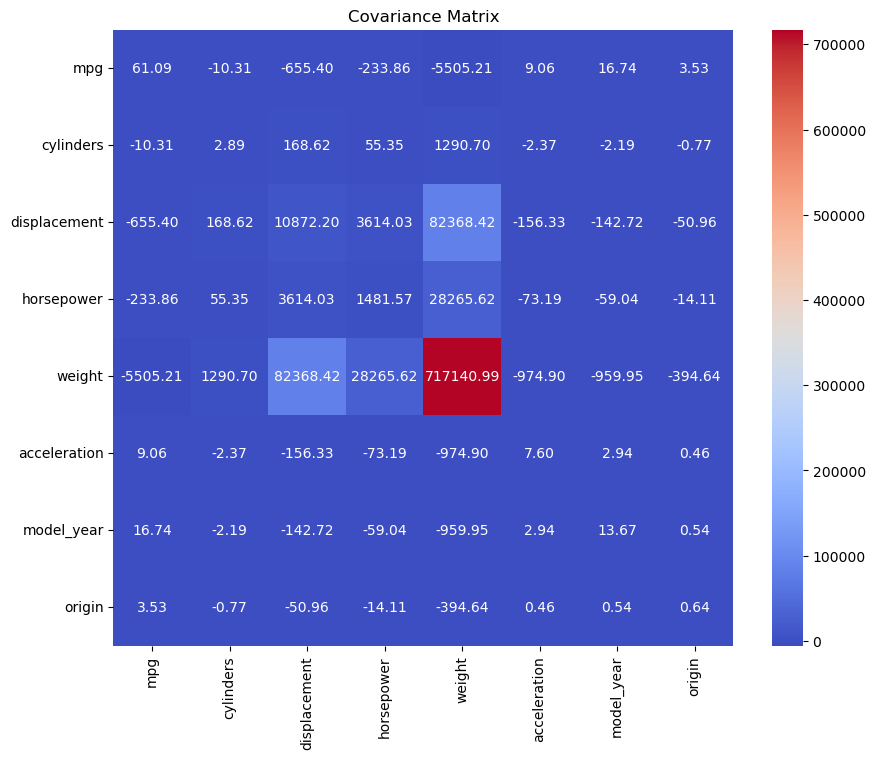

In [65]:
plt.figure(figsize=(10, 8))
sns.heatmap(covariance_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Covariance Matrix')
plt.show()

In [67]:
correlation_matrix = df_numeric.corr()
correlation_matrix

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137,0.205873
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.455171,-0.581024,0.205873,0.180662,1.000000


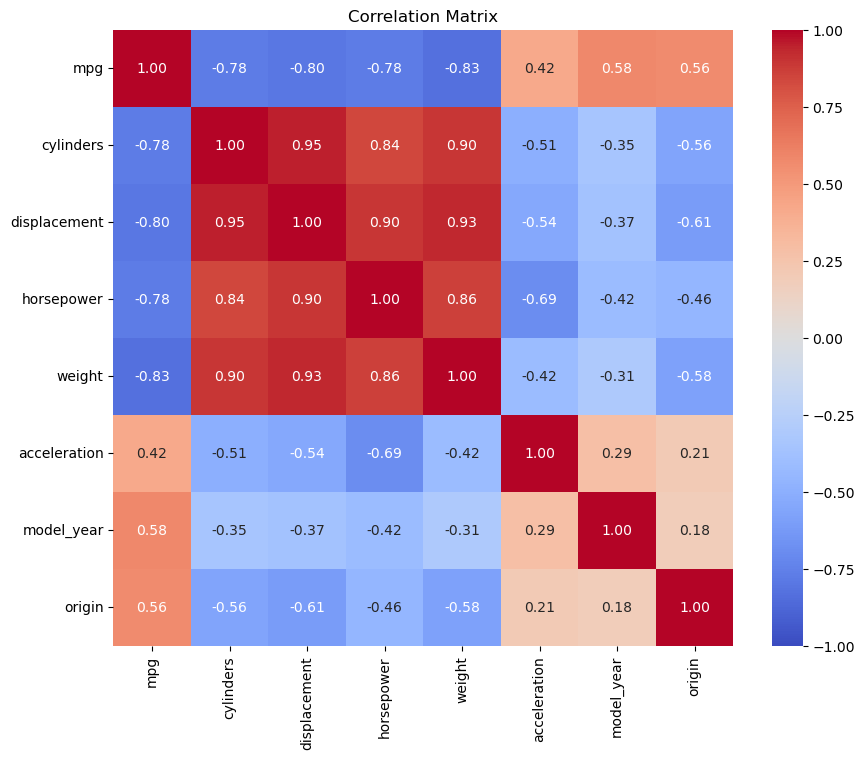

In [68]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

#### 4. If you had to remove 2 of the attributes above from the dataset based on these two matrices, which attributes would you remove and why? Explain your answer.

I would remove displacement and weight because they both have high correlations with each other and the same attributes (horsepower and cylinders). The problem with this is that it can introduce redundancy into our analyses.

#### 5. Dimensionality Reduction Load the dataset into Python. Apply Principal Components Analysis to reduce the dimensionality of the full dataset. How many dimensions (= attributes) does the original dataset contain? How many dimensions are obtained after PCA? How much of the variance 3 do they explain? Include in your report the linear combinations that define the first new attribute (= component) obtained. Look at the results and elaborate on any interesting observations you can make about the results.

In [81]:
df_numeric.shape[1]

8

In [75]:
df_numeric.dropna(inplace=True)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)
pca = PCA()
principal_components = pca.fit_transform(df_scaled)
principal_components

array([[ 2.71838083e+00,  9.53771308e-01,  2.13580572e-01, ...,
        -4.72254821e-01, -1.05544776e-01, -1.18490763e-01],
       [ 3.54159087e+00,  1.06142653e+00, -3.52302911e-02, ...,
        -1.47361405e-03,  2.19929249e-01,  6.88329898e-02],
       [ 3.03516277e+00,  1.16669616e+00, -1.49186883e-01, ...,
        -2.18683424e-01,  1.38753281e-01, -8.92666026e-02],
       ...,
       [-1.31709677e+00, -6.75171252e-01, -1.74646384e+00, ...,
        -4.07232871e-02, -2.10014691e-01,  6.58843764e-02],
       [-1.74746760e+00, -1.77345152e+00,  6.97238764e-02, ...,
         2.82103323e-01,  1.33690561e-01, -7.67384260e-03],
       [-1.90048847e+00, -1.93771253e+00,  1.25280353e-01, ...,
         5.68609839e-01,  8.64708263e-02, -9.49242324e-02]])

In [82]:
principal_components.shape[1]

8

In [80]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.67198404, 0.11795791, 0.10145546, 0.06076949, 0.02285332,
       0.01429024, 0.00669335, 0.00399619])

In [78]:
cumulative_variance = np.cumsum(explained_variance)
cumulative_variance

array([0.67198404, 0.78994195, 0.8913974 , 0.95216689, 0.97502021,
       0.98931046, 0.99600381, 1.        ])

In [85]:
pc1_loadings = pca.components_[0]

pc1_df = pd.DataFrame(pc1_loadings, index=df_numeric.columns, columns=['PC1 Loadings'])
pc1_df

,PC1 Loadings
mpg,-0.385862
cylinders,0.402389
displacement,0.416444
horsepower,0.401836
weight,0.401576
acceleration,-0.264731
model_year,-0.213868
origin,-0.277868


67.2% of the variance in the dataset is explained by the first principal component and 89.1% of the variance in the dataset is explained by the first three principal components. The other five prinicpal components explain the last 10.9% of the variance in the dataset. The coefficients of PC1 show postivive values of around 0.4 for cylinders, displacement, horsepower, and weight. This tells me that this component captures the size and power or vehicles. 